In [2]:
# use scikit-learn regression model
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

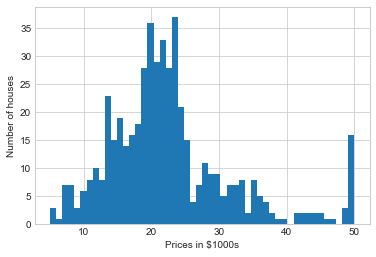

In [7]:
plt.hist(boston.target, bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of rooms')

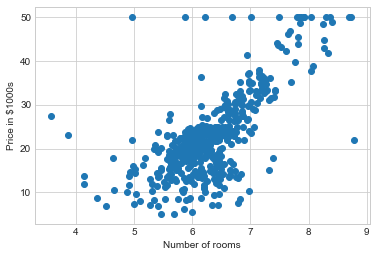

In [8]:
# every attribute in the fifth columns
plt.scatter(boston.data[:, 5], boston.target)

#clean on your own data
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [9]:
boston_df = DataFrame(boston.data)

In [10]:
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
# add Price columns to the data frame
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


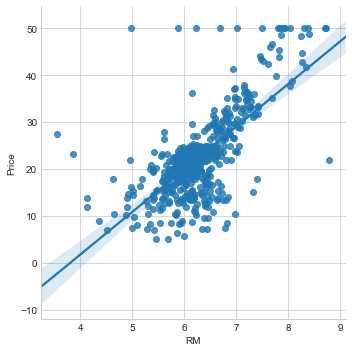

In [12]:
sns.lmplot('RM', 'Price', data=boston_df)

In [18]:
# Set up X as medium room values
X = np.vstack(boston_df.RM)

# Use v to make X two-dimention
#X = np.vstack()

Y = boston_df.Price

# Create the X array in the form [X 1]
X = np.array([[value,1] for value in X])

In [20]:
# create m, b object, linear algebra library
m,b = np.linalg.lstsq(X, Y, rcond=-1)[0]

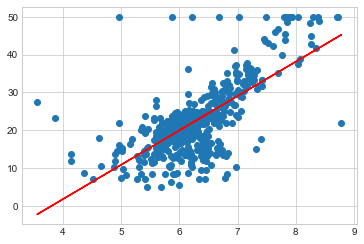

In [21]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM

plt.plot(x, m*x + b, 'r', label = 'Best fit line')

In [23]:
result = np.linalg.lstsq(X, Y, rcond=-1)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print 'The root mean square error was %.2f' %rmse

The root mean square error was 6.60


In [24]:
# import Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [25]:
lreg = LinearRegression()

X_muti = boston_df.drop('Price', 1)

Y_target = boston_df.Price

In [26]:
lreg.fit(X_muti, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print 'The estimated intercept coefficient is %.2f ' %lreg.intercept_
print 'The number of coefficient used was %d' %len(lreg.coef_)

The estimated intercept coefficient is 36.49 
The numerb fo coefficient used was 13


In [28]:
# dataframe of coefficient
coff_df = DataFrame(boston_df.columns)
coff_df.colums = ['Features']

coff_df['Coefficient Estimate'] = Series(lreg.coef_)
coff_df

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,0,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [31]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [32]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


In [33]:
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
pred_train = lreg.predict(X_train)

In [35]:
pred_test = lreg.predict(X_test)

In [37]:
print "Fit a model X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2)

Fit a model X_train, and calculate the MSE with Y_train: 42.20


In [39]:
print "Fit a model X_train, and calculate the MSE with X_test and Y_test: %.2f" %np.mean((Y_test - pred_test)**2)

Fit a model X_train, and calculate the MSE with X_test and Y_test: 47.88


Text(0.5,1,'Residual Plots')

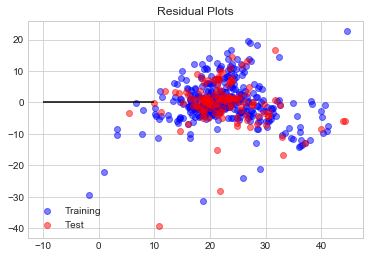

In [41]:
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.5)

plt.hlines(y=0, xmin=-10, xmax = 10)

plt.legend((train, test), ('Training', 'Test'), loc='lower left')

plt.title('Residual Plots')